In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.linear_model import LinearRegression


# Filter out import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
#check for missing values
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew_Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [18]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

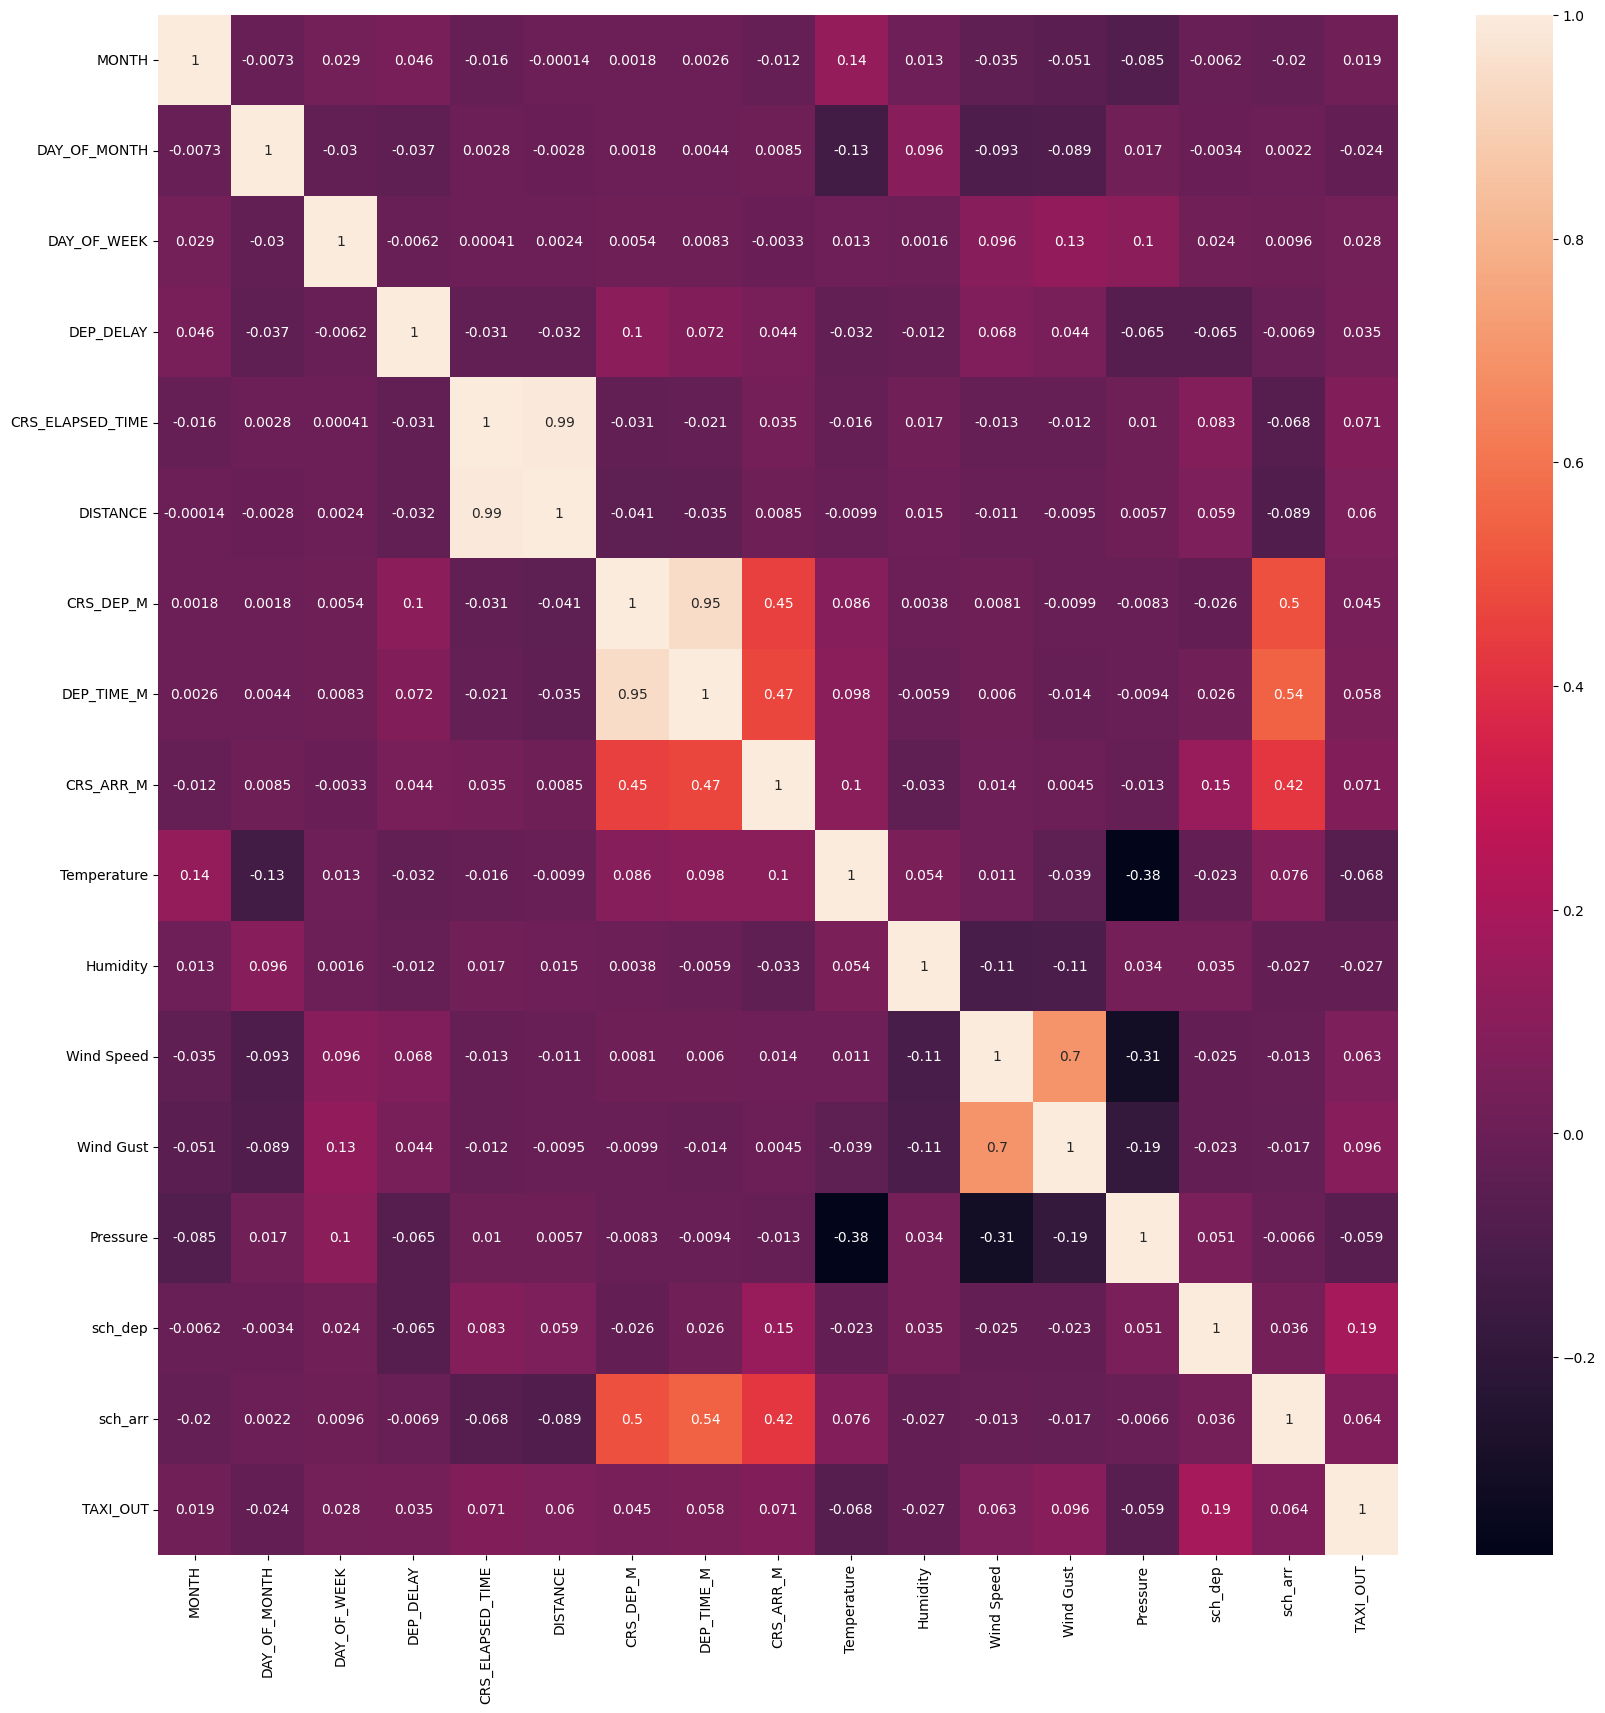

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot=True)

In [25]:
data_to_use = df.reindex(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])
data_types = data_to_use.dtypes
print(data_types)

MONTH                 int64
DAY_OF_MONTH          int64
DAY_OF_WEEK           int64
DEP_DELAY             int64
CRS_ELAPSED_TIME      int64
DISTANCE              int64
CRS_DEP_M             int64
DEP_TIME_M            int64
CRS_ARR_M             int64
Temperature           int64
Dew_Point           float64
Wind Gust             int64
Pressure            float64
sch_dep               int64
sch_arr               int64
TAXI_OUT              int64
dtype: object


In [26]:
data_to_use

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34.0,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34.0,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34.0,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34.0,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32.0,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,38.0,0,30.18,20,32,19
28816,1,31,5,2,75,187,1390,1392,25,39,38.0,0,30.18,19,23,22
28817,1,31,5,283,392,2422,1125,1408,1337,39,38.0,0,30.18,19,23,21
28818,1,31,5,5,224,1598,1417,1422,261,39,38.0,0,30.18,19,23,13


In [27]:
data_to_use['Dew_Point'].dtype

dtype('float64')

In [19]:
# Convert 'Dew_Point' column to float, handling errors
try:
    df['Dew_Point'] = df['Dew_Point'].astype(float)
except ValueError as e:
    print("Error converting 'Dew_Point' column to float:", e)



In [28]:
data_to_use['Dew_Point'].isnull().sum()


0

In [29]:
num_cols = len(data_to_use.columns)
num_cols

16

In [30]:
data_to_use.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature',
       'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'],
      dtype='object')

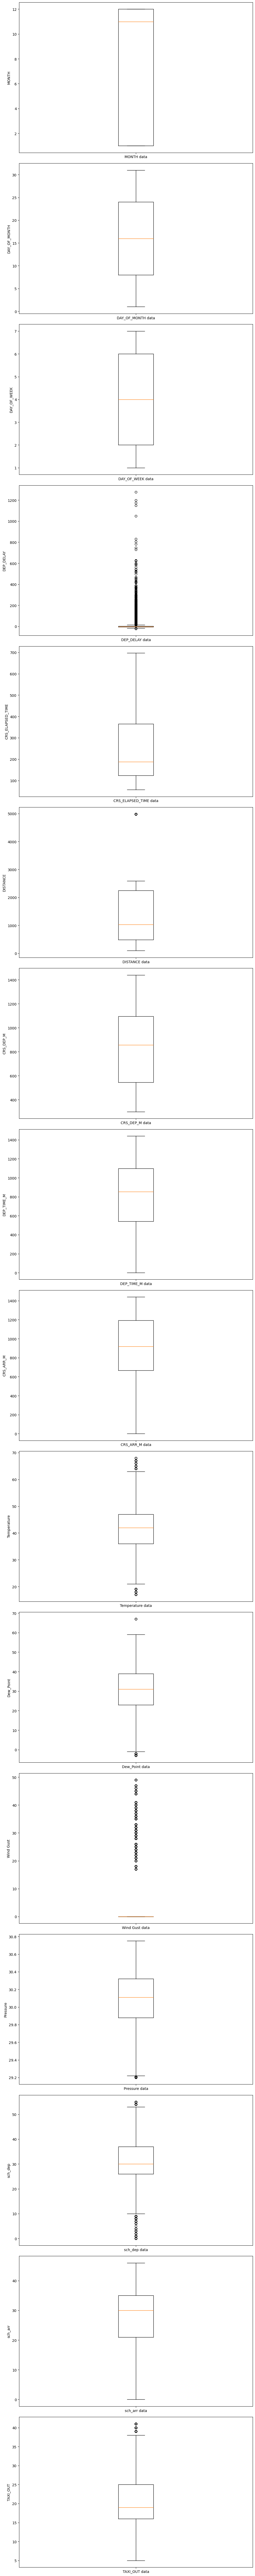

In [48]:
num_cols = len(data_to_use.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 100))

# Create a boxplot for each column
for i, col in enumerate(data_to_use.columns):
    ax = axes[i]
    ax.boxplot(data_to_use[col])
    ax.set_ylabel(col)
    # ax.set_xlabel(col)
    ax.set_xticklabels([col + " DATA"])

plt.tight_layout()
plt.show()

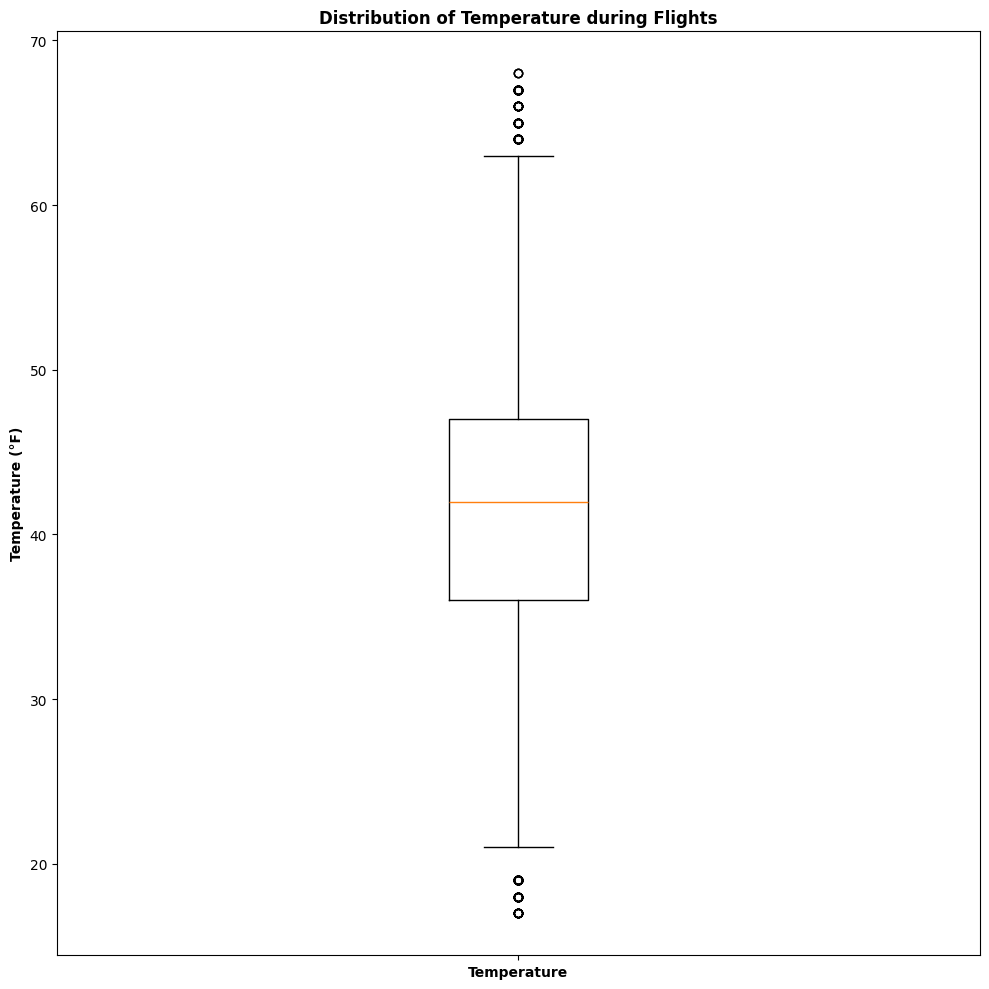

In [57]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 10))

ax.boxplot(data_to_use['Temperature'])

ax.set_ylabel("Temperature (°F)", fontweight='bold')
ax.set_xticklabels(['Temperature'], fontweight='bold')
ax.set_title('Distribution of Temperature during Flights', fontweight='bold')

plt.tight_layout()
plt.show()

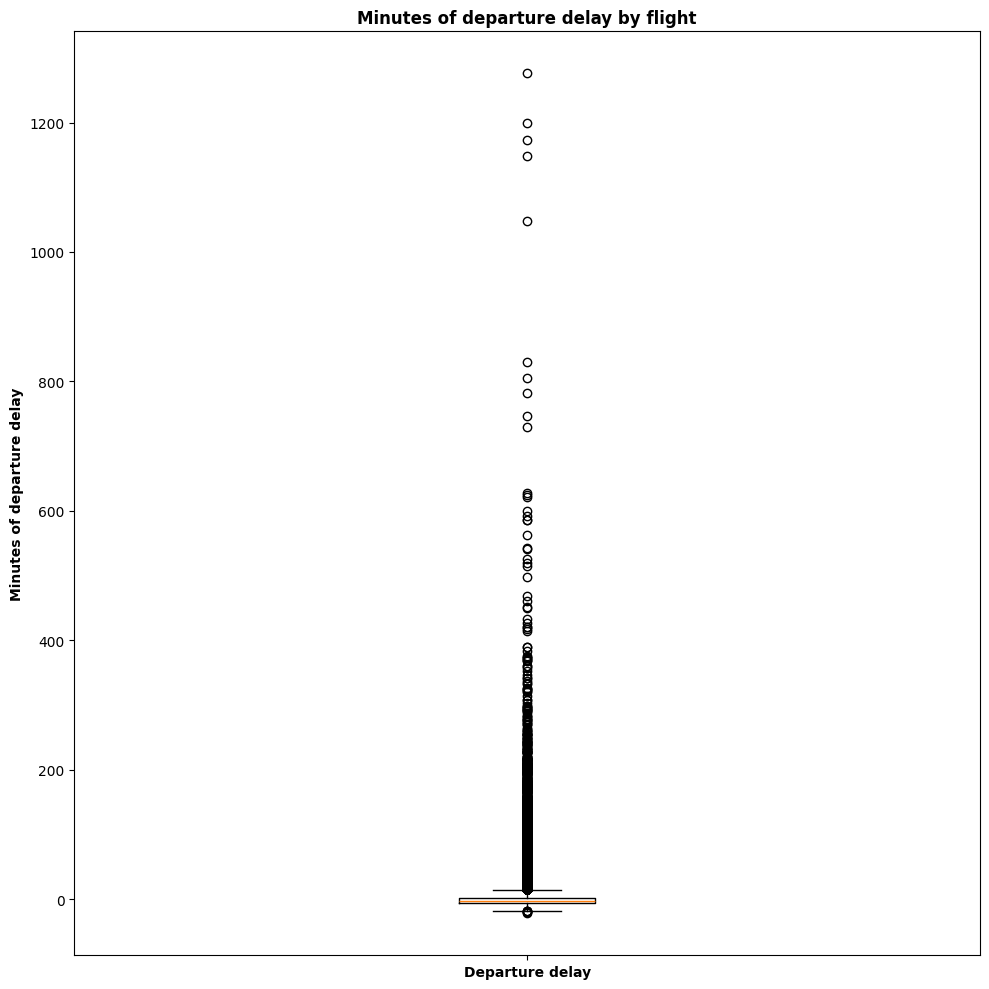

In [58]:
fig, axes = plt.subplots(nrows=1, figsize=(10, 10))

ax = axes
ax.boxplot(data_to_use['DEP_DELAY'])
ax.set_ylabel("Minutes of departure delay", fontweight='bold')
ax.set_xticklabels(['Departure delay'], fontweight='bold')
ax.set_title('Minutes of departure delay by flight', fontweight='bold')

plt.tight_layout()
plt.show()

In [66]:

# Reindex the DataFrame with the desired columns
data_to_use = df.reindex(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])

# Calculate the median for each column
median_values = data_to_use.median()

# Define the outlier threshold (e.g., 1.5 times the interquartile range)
outlier_threshold = 1.5

# Replace outliers in 'DEP_DELAY', 'DISTANCE', and 'Wind Gust' columns with median values
for col in ['DEP_DELAY', 'DISTANCE', 'Wind Gust']:
    median = median_values[col]
    q1 = data_to_use[col].quantile(0.25)
    q3 = data_to_use[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    data_to_use[col] = data_to_use[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# You can also replace outliers in other columns similarly if needed

# Print the updated DataFrame
print(data_to_use)
new_csv_filename = "updated_data.csv"  # Specify the filename for the new CSV file
data_to_use.to_csv(new_csv_filename, index=False)

       MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  CRS_ELAPSED_TIME  \
0         11             1            5       -1.0               124   
1         11             1            5       -7.0               371   
2         11             1            5       -3.0               181   
3         11             1            5       -2.0               168   
4         11             1            5       -4.0               139   
...      ...           ...          ...        ...               ...   
28815      1            31            5        2.0                57   
28816      1            31            5        2.0                75   
28817      1            31            5       -3.0               392   
28818      1            31            5        5.0               224   
28819      1            31            5       -1.0               225   

       DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature  Dew_Point  \
0         636.0        324         323        448         

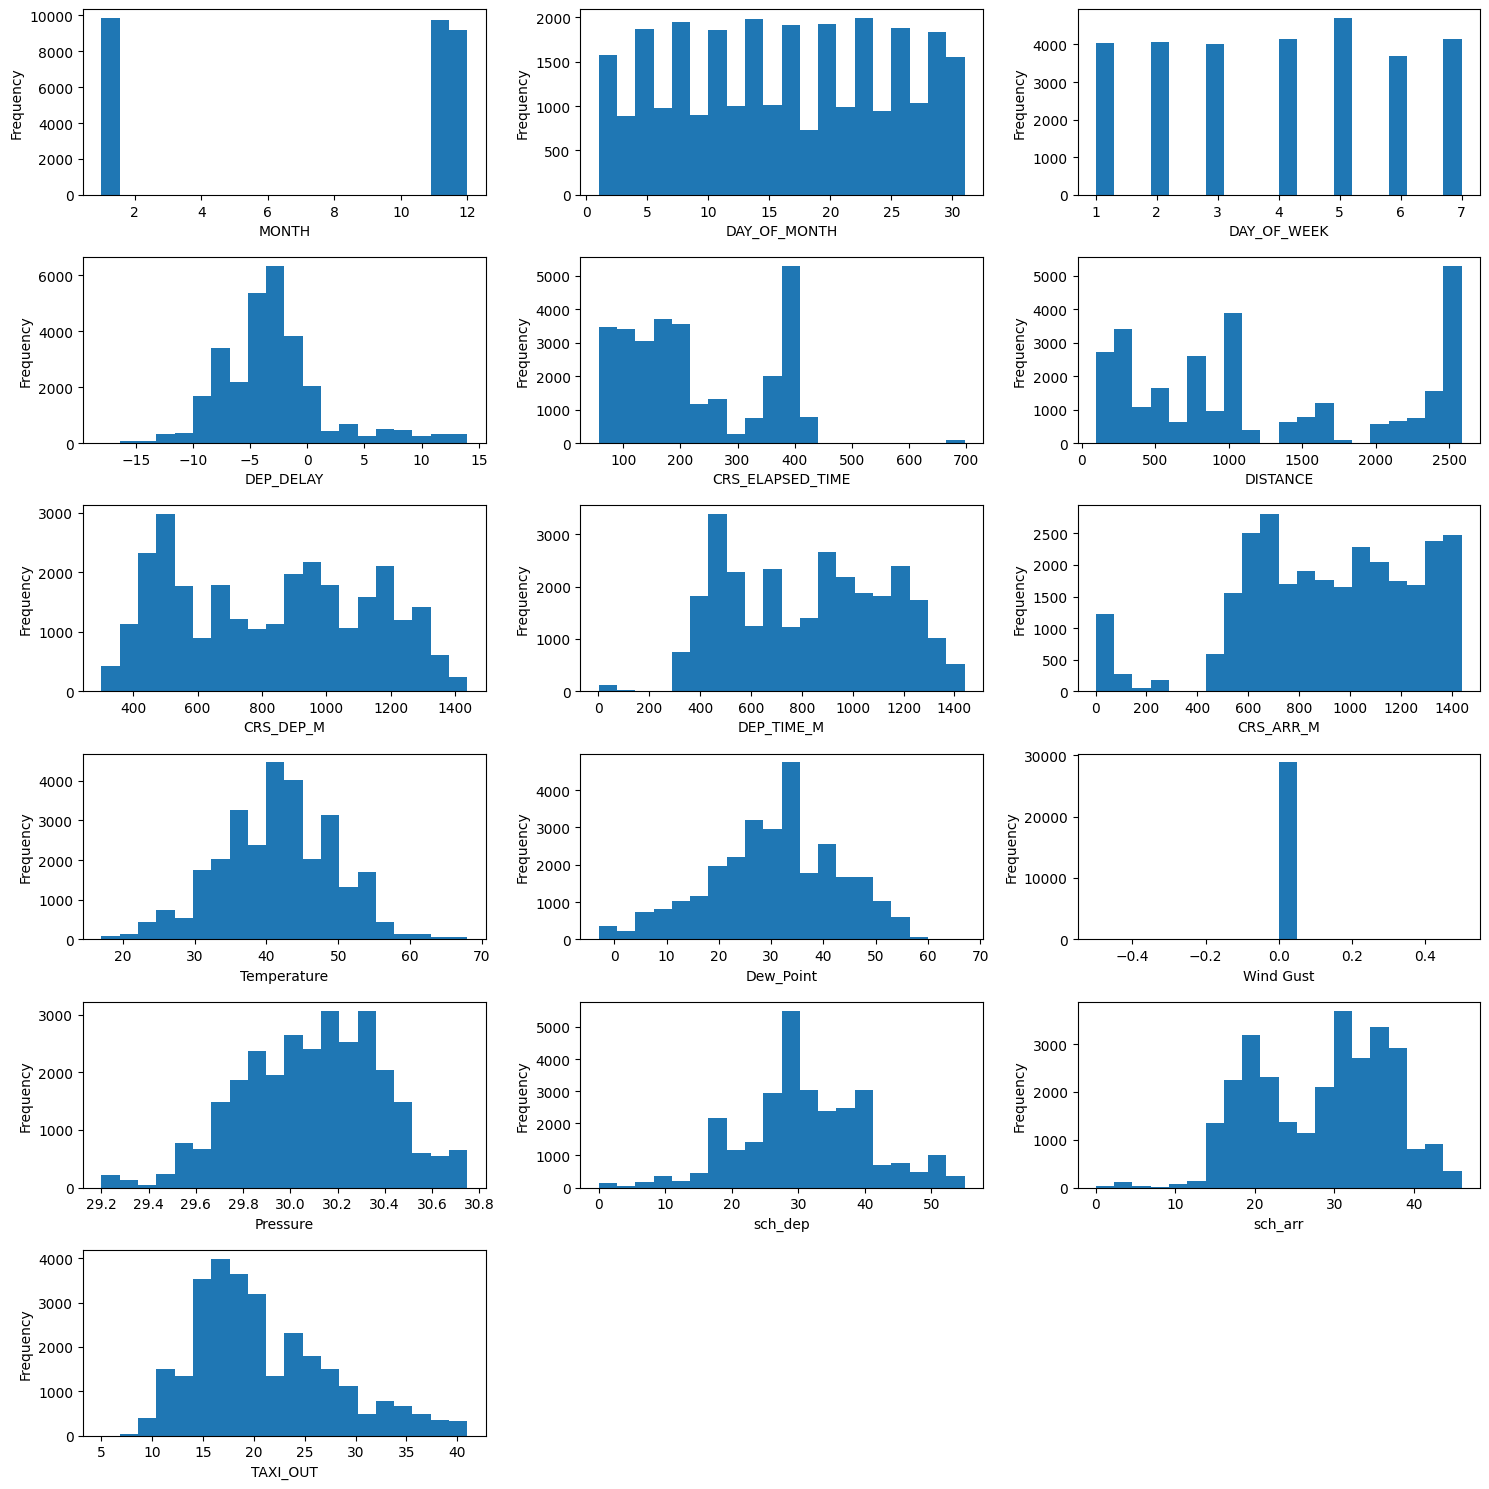

In [62]:


# Create a subplot grid with 3 rows and 3 columns, or adjust based on the number of columns
num_cols = min(len(data_to_use.columns), 3)
num_rows = -(-len(data_to_use.columns) // num_cols)  # Round up division to get the number of rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histogram for each column
for i, col in enumerate(data_to_use.columns):
    ax = axes[i]
    ax.hist(data_to_use[col], bins=20)  # Adjust the number of bins as needed
    ax.set_ylabel('Frequency')  # Set the y-axis label
    ax.set_xlabel(col)  # Set the x-axis label to the column name

# Hide any unused subplots
for ax in axes[len(data_to_use.columns):]:
    ax.axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()



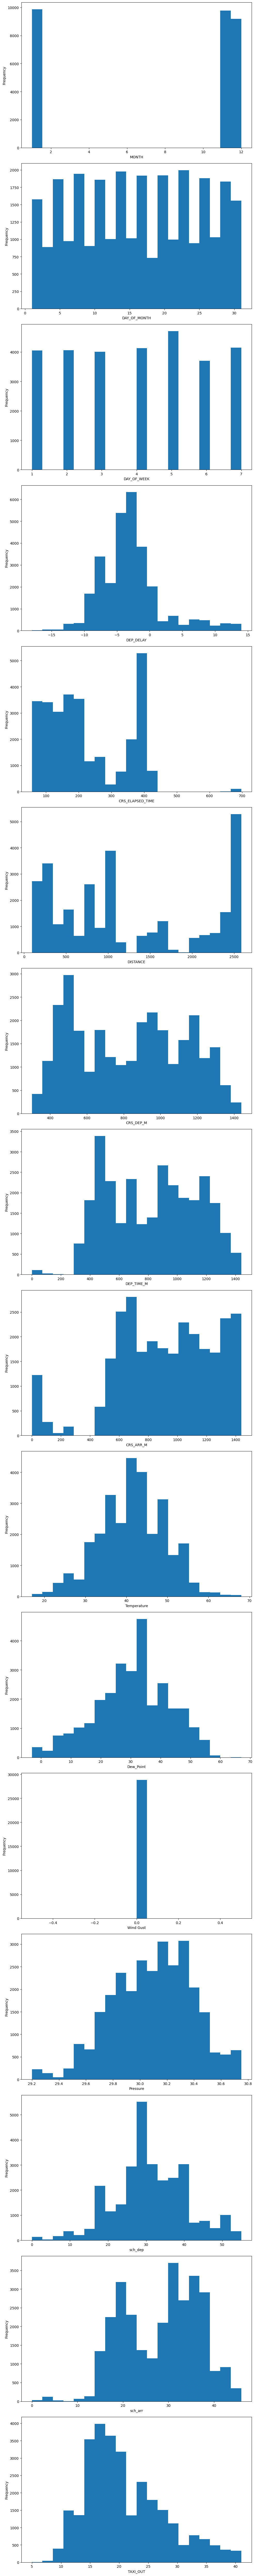

In [60]:
# Create a subplot grid based on the number of columns
num_cols = len(data_to_use.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 100))

# Create a histogram for each column
for i, col in enumerate(data_to_use.columns):
    ax = axes[i]
    ax.hist(data_to_use[col], bins=20)  # Adjust the number of bins as needed
    ax.set_ylabel('Frequency')  # Set the y-axis label
    ax.set_xlabel(col)  # Set the x-axis label to the column name

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

there are no continous value in some of the graphs

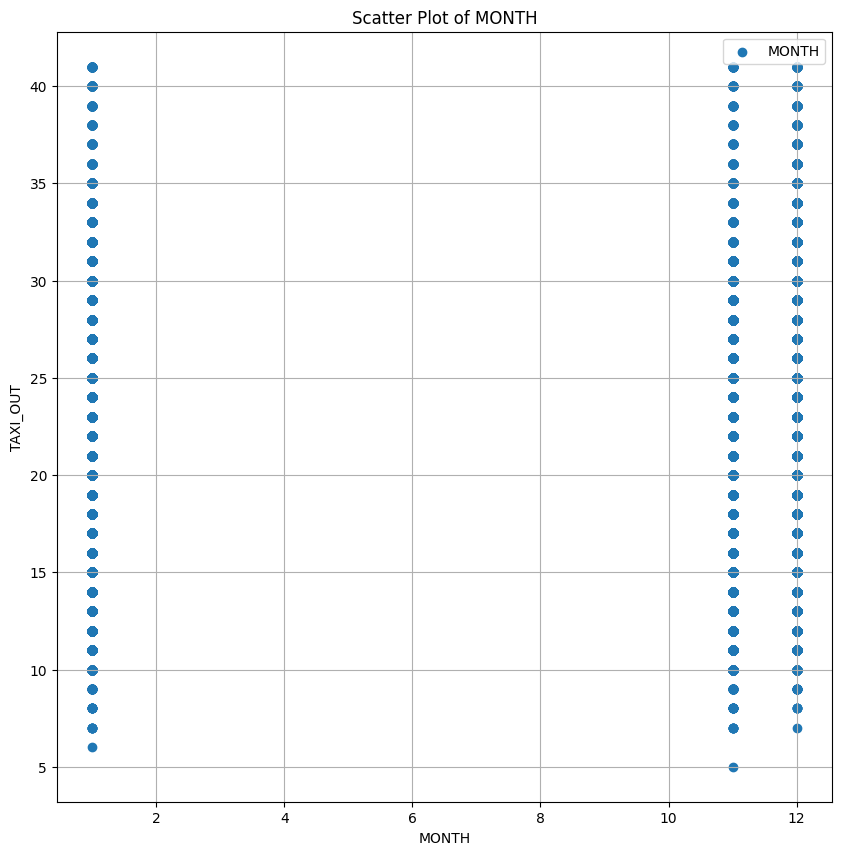

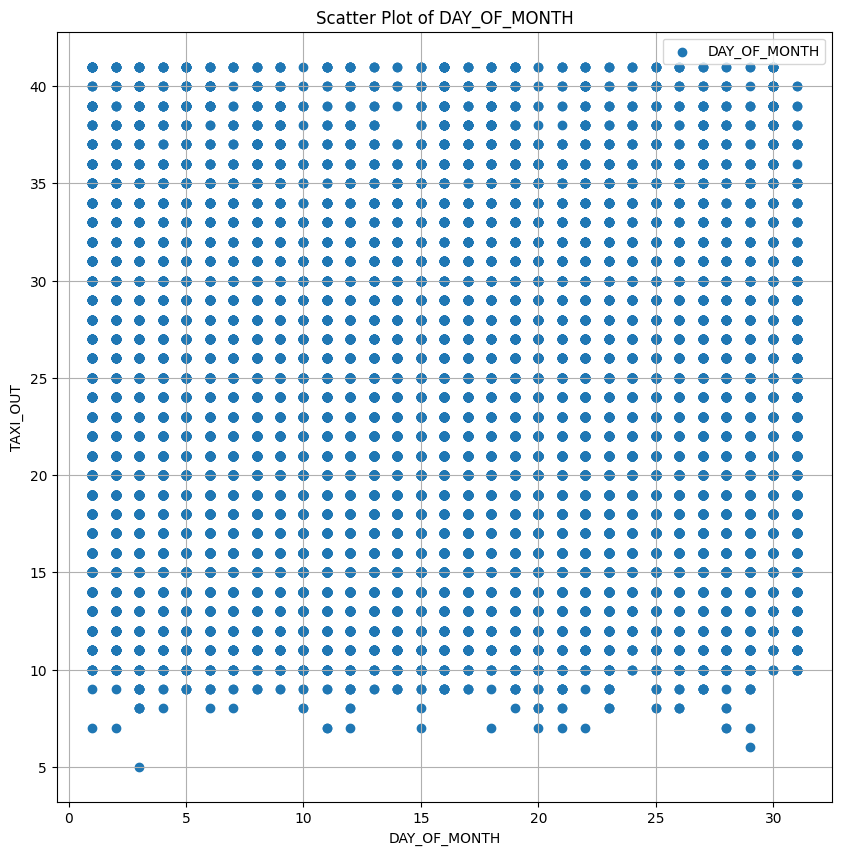

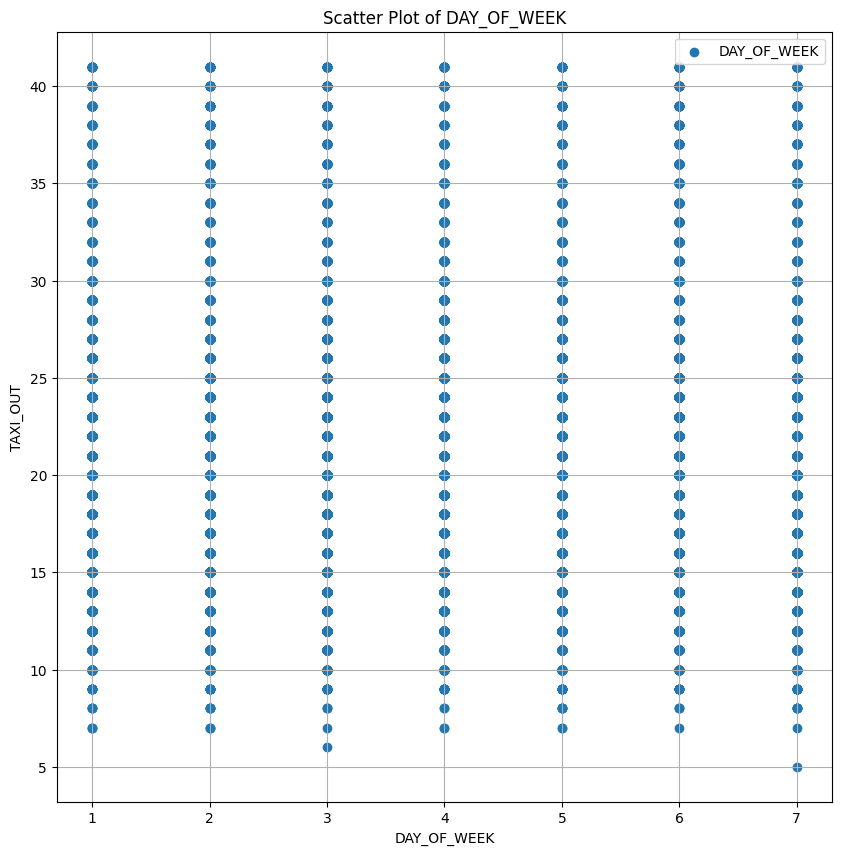

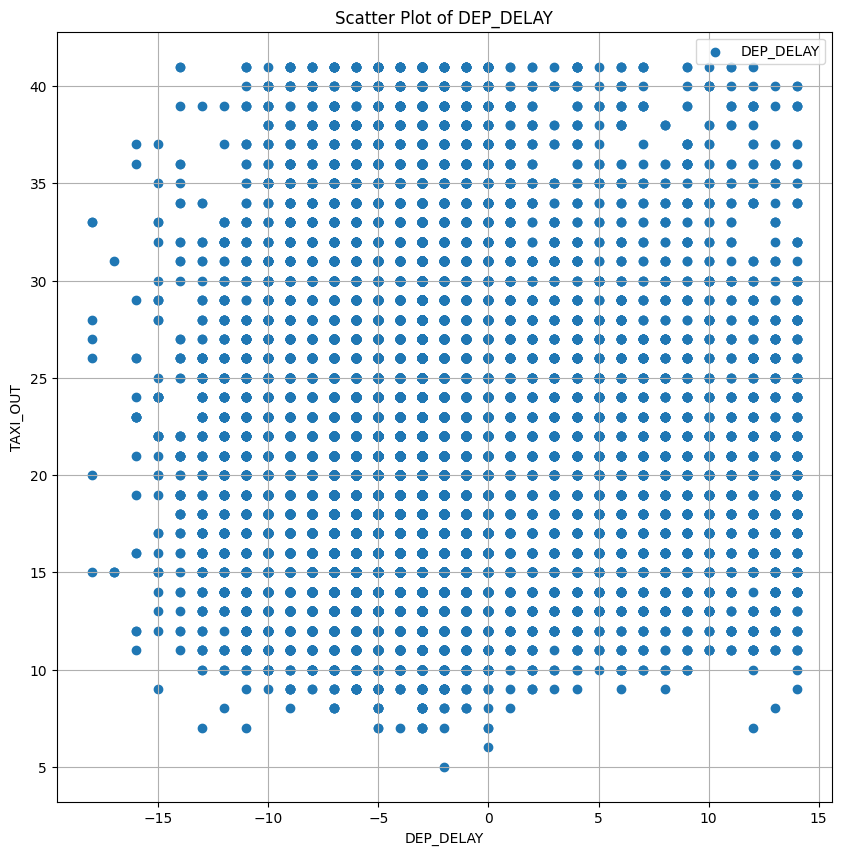

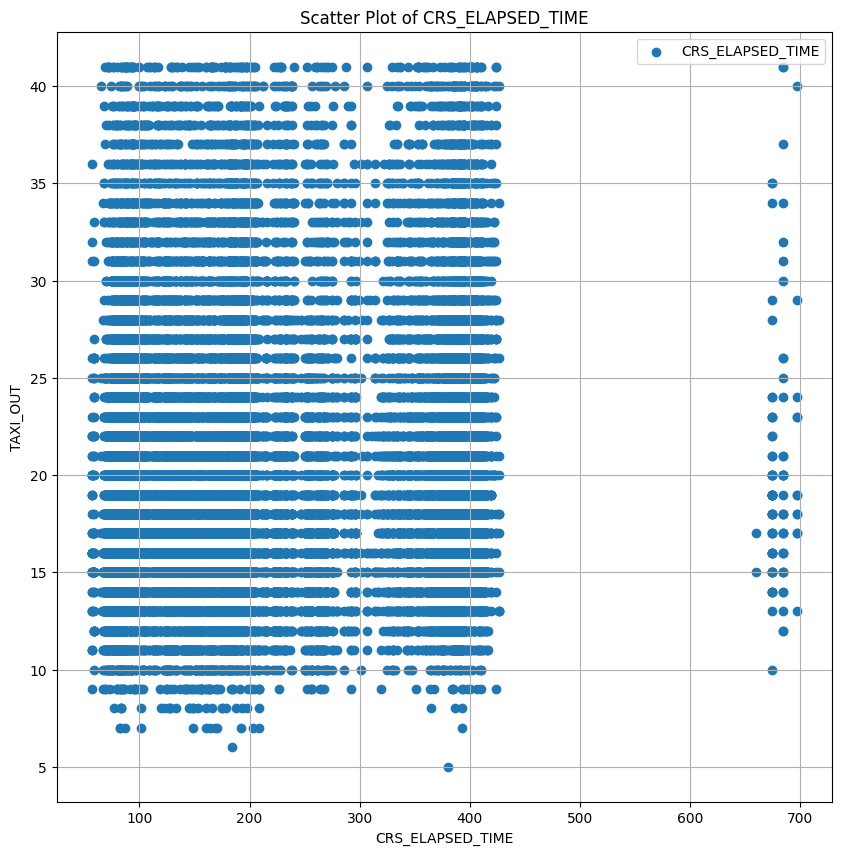

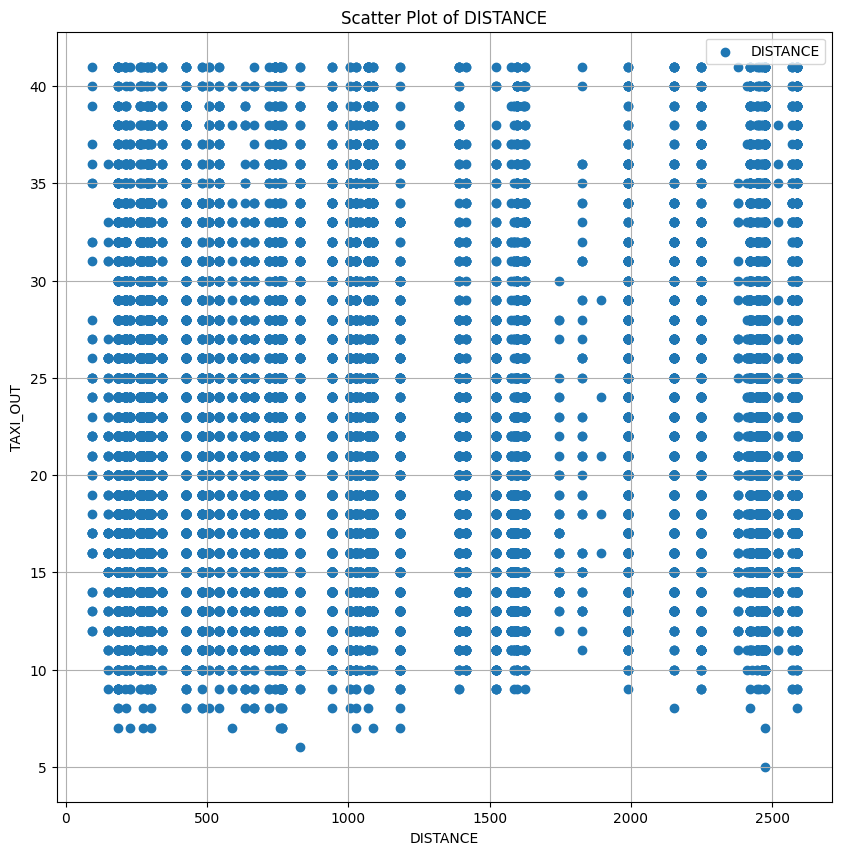

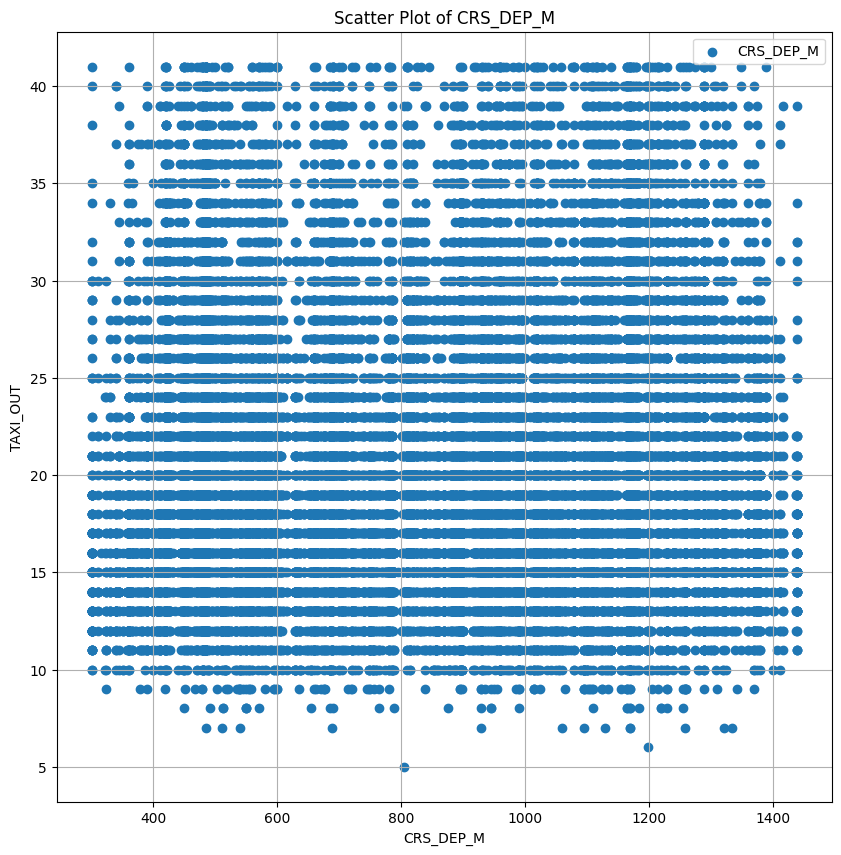

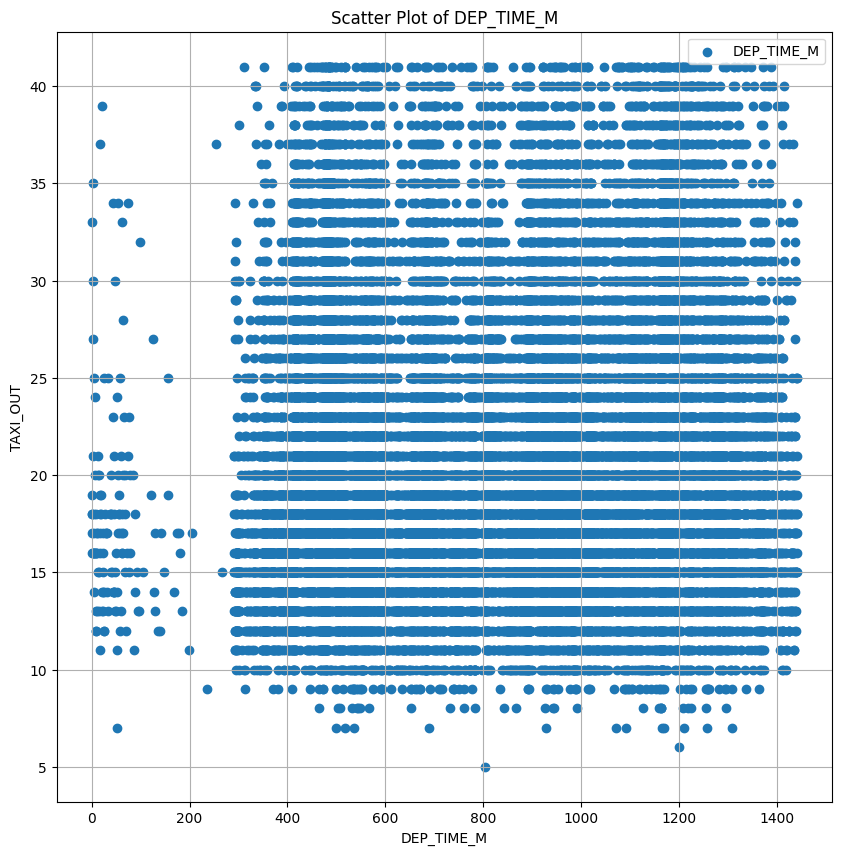

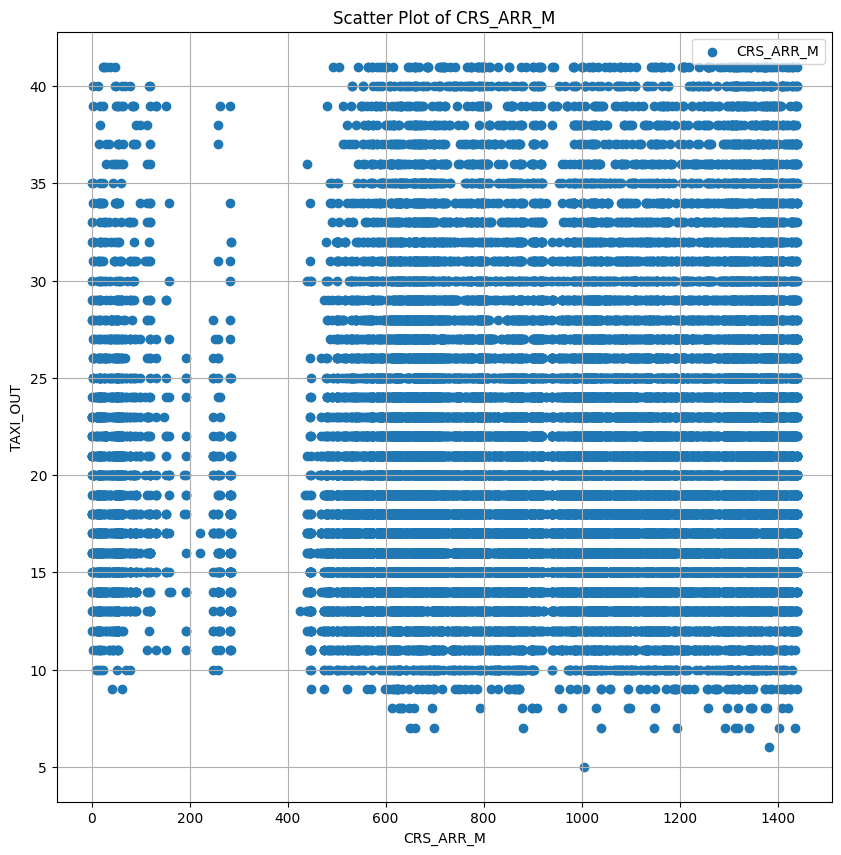

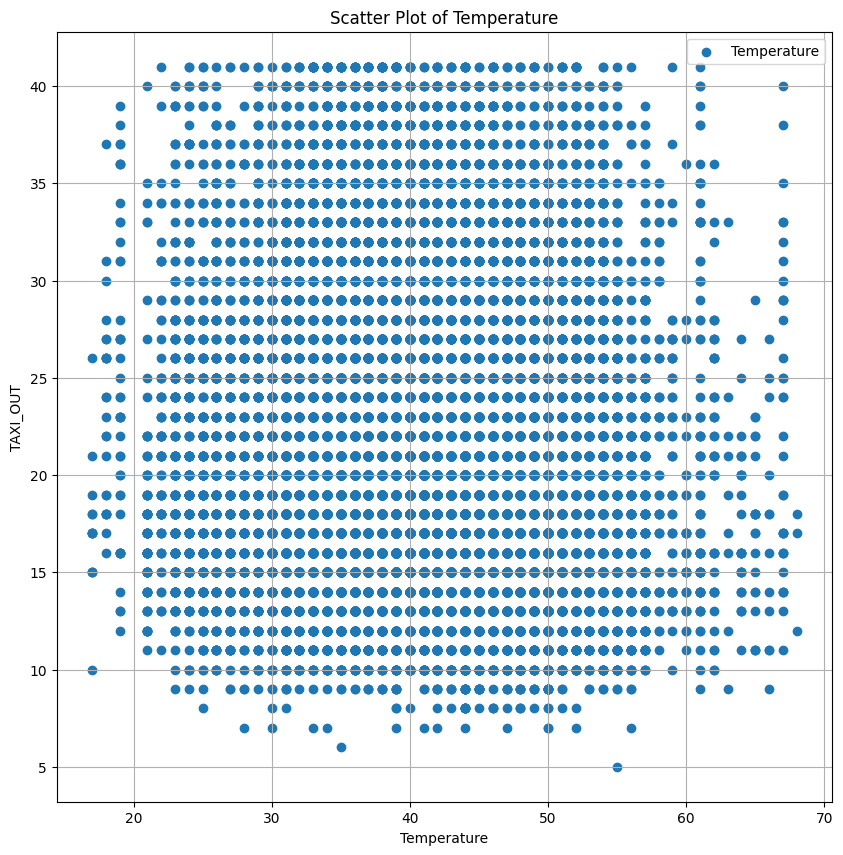

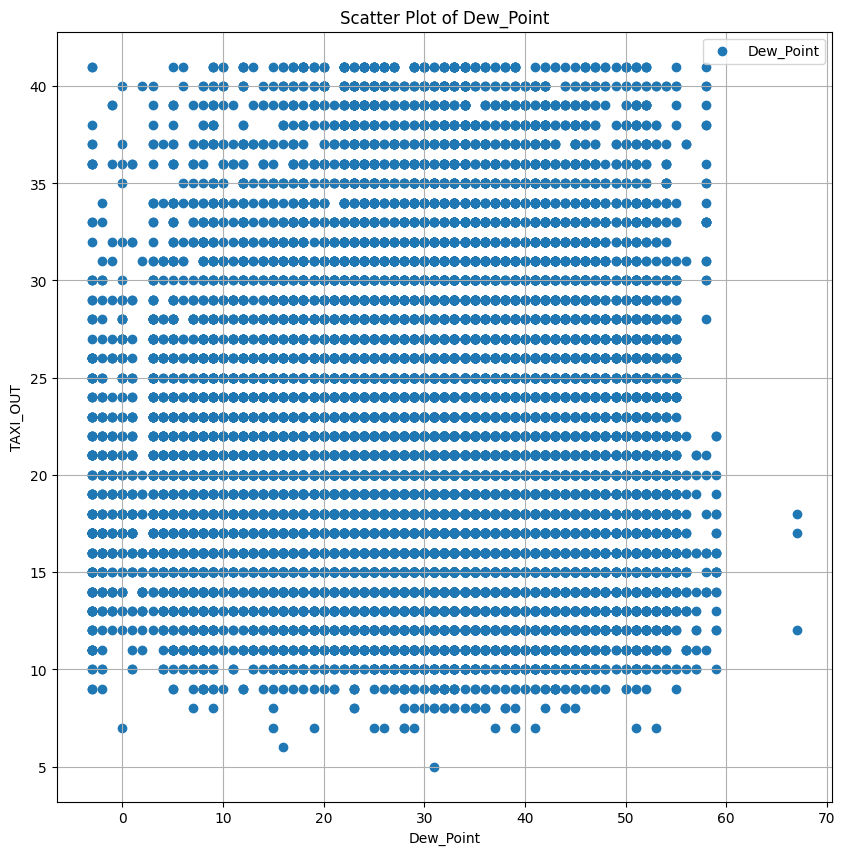

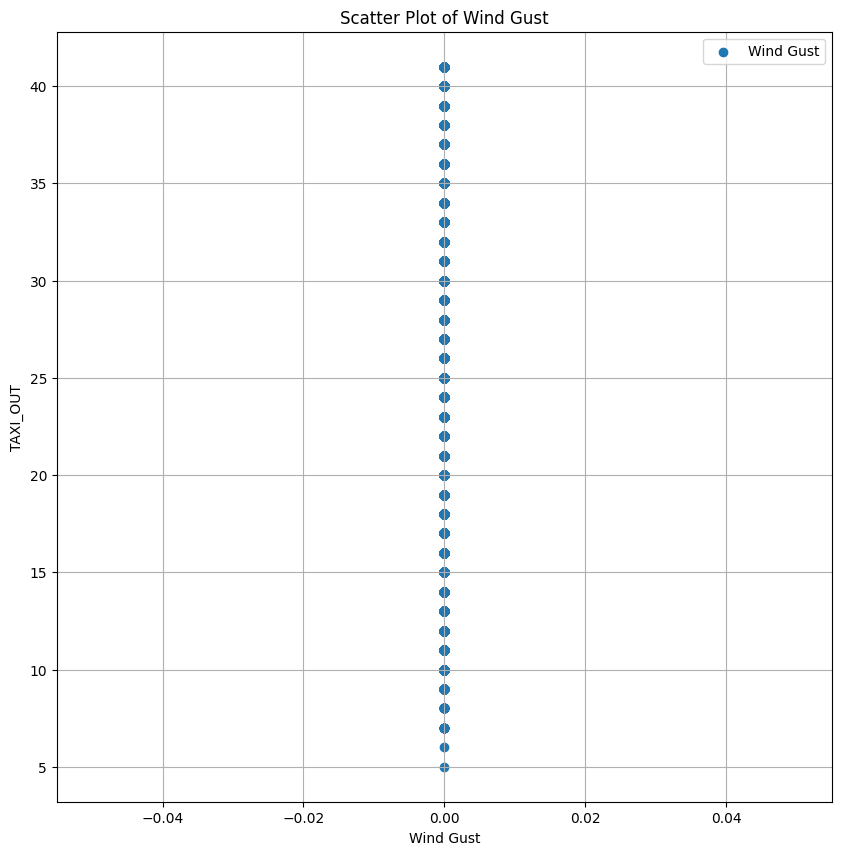

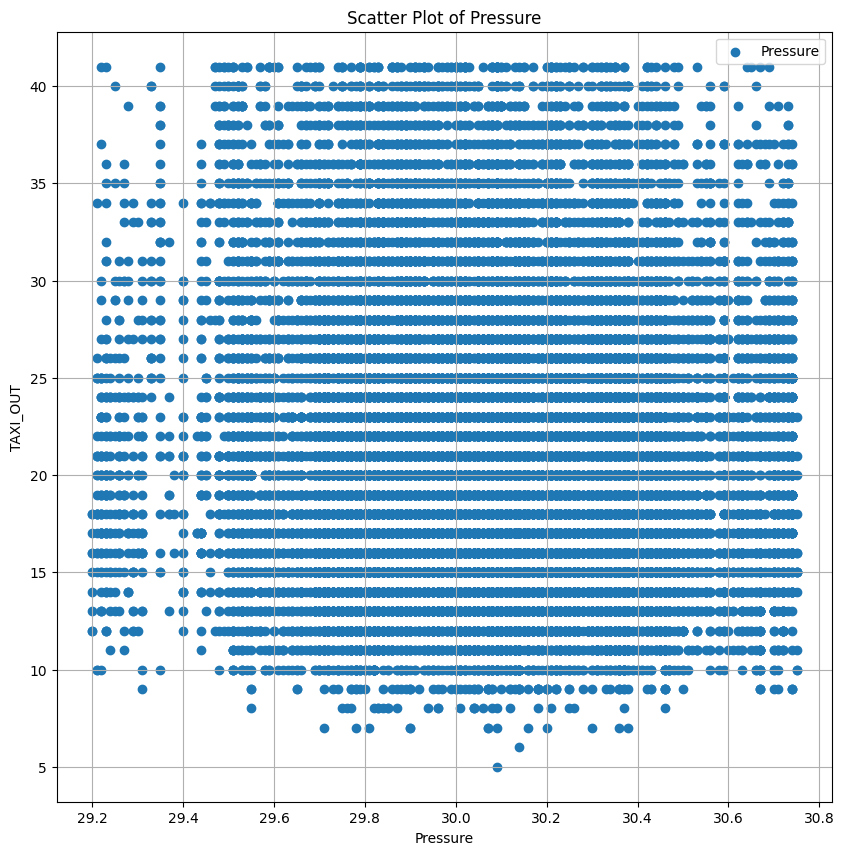

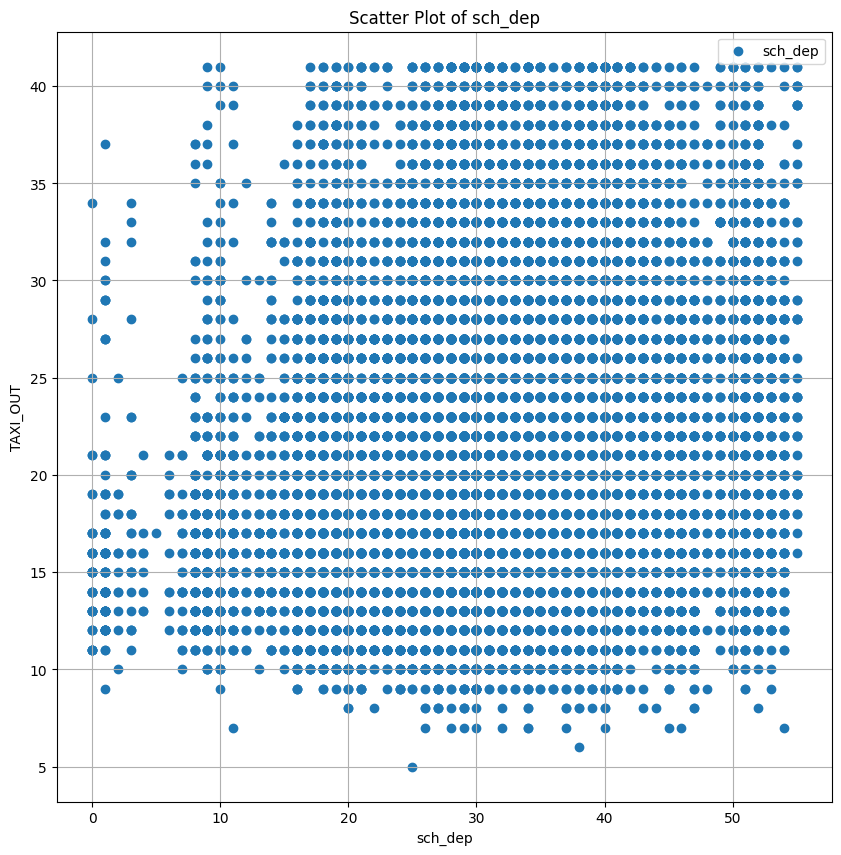

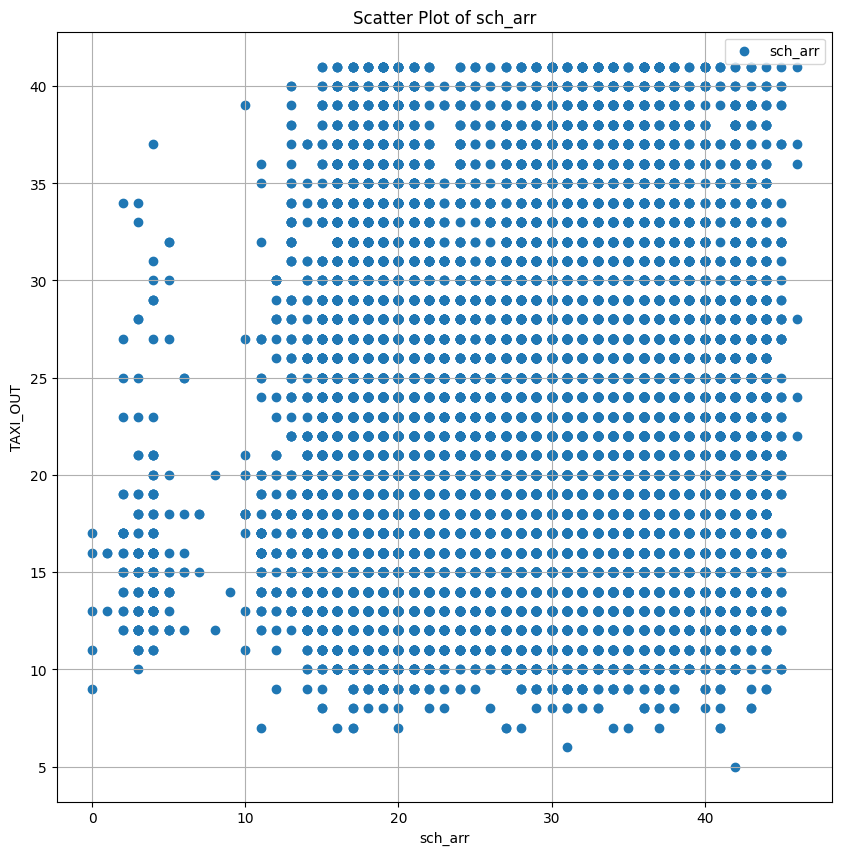

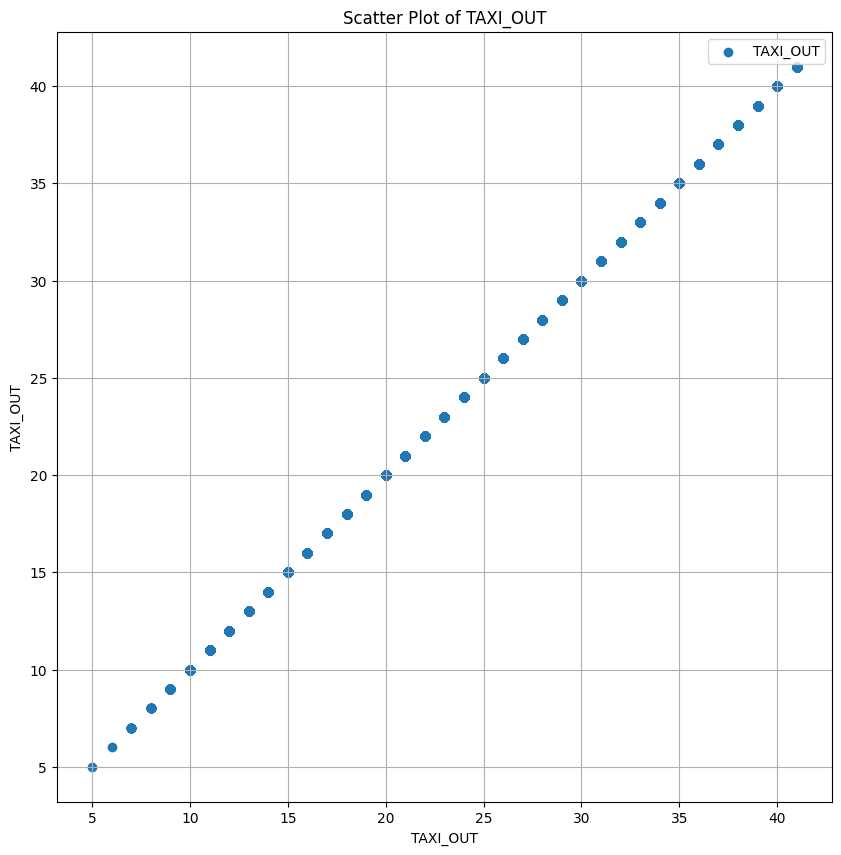

In [63]:
# Assuming x is your dataframe with columns to be plotted

# Create a scatter plot for each column on its own graph
for col in data_to_use.columns:
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    plt.scatter(data_to_use[col], data_to_use['TAXI_OUT'], label=col)
    plt.ylabel('TAXI_OUT')  # Assuming the index is used as the x-axis
    plt.xlabel(col)  # Assuming the y-axis label
    plt.title(f'Scatter Plot of {col}')  # Title of the plot
    plt.legend()  # Show legend with column name
    plt.grid(True)  # Add grid lines
    plt.show()


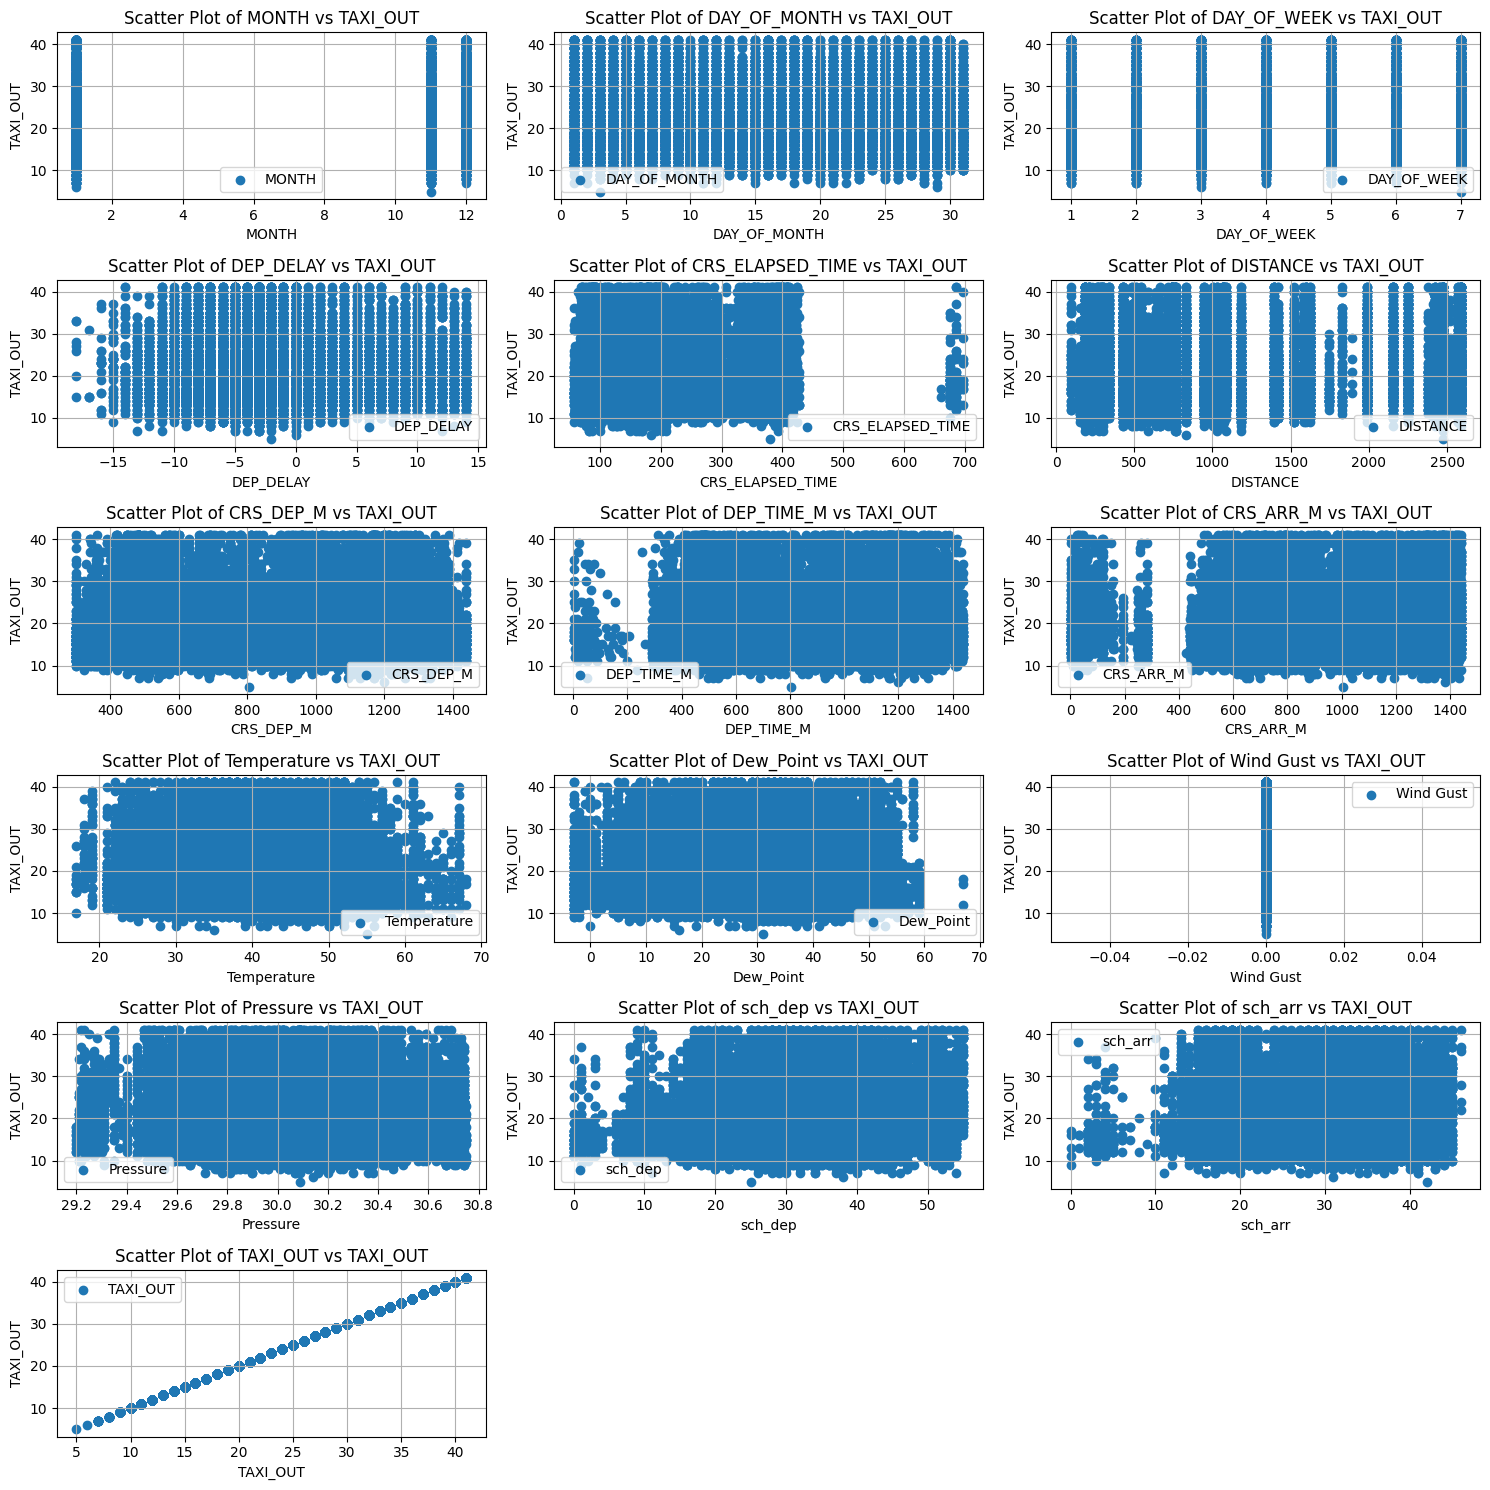

In [65]:

# Assuming data_to_use is your DataFrame and has been imported

# Determine the number of rows and columns for the subplot grid
num_cols = min(len(data_to_use.columns), 3)
num_rows = -(-len(data_to_use.columns) // num_cols)  # Round up division to get the number of rows

# Create a subplot grid with the determined number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column in the DataFrame
for i, col in enumerate(data_to_use.columns):
    # Create a new figure for each scatter plot
    ax = axes[i]

    # Create a scatter plot for the current column against 'TAXI_OUT'
    ax.scatter(data_to_use[col], data_to_use['TAXI_OUT'], label=col)

    # Set labels and title
    ax.set_xlabel(col)  # Label for the x-axis (current column)
    ax.set_ylabel('TAXI_OUT')  # Label for the y-axis
    ax.set_title(f'Scatter Plot of {col} vs TAXI_OUT')  # Title of the plot

    # Show legend
    ax.legend()

    # Show grid
    ax.grid(True)

# Hide any unused subplots
for ax in axes[len(data_to_use.columns):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()